In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline 

In [38]:
# import the data:
df = pd.read_csv('heart.csv')
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [39]:
# doing one hot encoding for categorical features
ohe_sex = pd.get_dummies(df.Sex, prefix='Sex')
ohe_chestpain = pd.get_dummies(df.ChestPainType, prefix='ChestPainType')
ohe_restingecg = pd.get_dummies(df.RestingECG, prefix='RestingECG')
ohe_exerciseangina = pd.get_dummies(df.ExerciseAngina, prefix='ExerciseAngina')
ohe_stslope = pd.get_dummies(df.ST_Slope, prefix='ST_Slope')
print (ohe_chestpain)

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA
0                    0                  1                  0                 0
1                    0                  0                  1                 0
2                    0                  1                  0                 0
3                    1                  0                  0                 0
4                    0                  0                  1                 0
..                 ...                ...                ...               ...
913                  0                  0                  0                 1
914                  1                  0                  0                 0
915                  1                  0                  0                 0
916                  0                  1                  0                 0
917                  0                  0                  1                 0

[918 rows x 4 columns]


In [40]:
# creating our variables to store the data
y = df['HeartDisease']
X = df[['Age', 'RestingBP','FastingBS','MaxHR','Oldpeak']]
# adding the encoded features
X['Male'] = ohe_sex['Sex_M']
X['Female'] = ohe_sex['Sex_F']

X['CPT_ASY'] = ohe_chestpain['ChestPainType_ASY']
X['CPT_ATA'] = ohe_chestpain['ChestPainType_ATA']
X['CPT_NAP'] = ohe_chestpain['ChestPainType_NAP']
X['CPT_TA'] = ohe_chestpain['ChestPainType_TA']

X['ECG_LVH'] = ohe_restingecg['RestingECG_LVH']
X['ECG_Normal'] = ohe_restingecg['RestingECG_Normal']
X['ECG_ST'] = ohe_restingecg['RestingECG_ST']

X['EA_N'] = ohe_exerciseangina['ExerciseAngina_N']
X['EA_Y'] = ohe_exerciseangina['ExerciseAngina_Y']

X['ST_Down'] = ohe_stslope['ST_Slope_Down']
X['ST_Flat'] = ohe_stslope['ST_Slope_Flat']
X['ST_Up'] = ohe_stslope['ST_Slope_Up']



<ipython-input-40-7735da6dc742>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Male'] = ohe_sex['Sex_M']
<ipython-input-40-7735da6dc742>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Female'] = ohe_sex['Sex_F']
<ipython-input-40-7735da6dc742>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [41]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

print (X)

[[-1.4331398   0.41090889 -0.55134134 ... -0.27144836 -1.00218103
   1.15067399]
 [-0.47848359  1.49175234 -0.55134134 ... -0.27144836  0.99782372
  -0.86905588]
 [-1.75135854 -0.12951283 -0.55134134 ... -0.27144836 -1.00218103
   1.15067399]
 ...
 [ 0.37009972 -0.12951283 -0.55134134 ... -0.27144836  0.99782372
  -0.86905588]
 [ 0.37009972 -0.12951283 -0.55134134 ... -0.27144836  0.99782372
  -0.86905588]
 [-1.64528563  0.30282455 -0.55134134 ... -0.27144836 -1.00218103
   1.15067399]]


In [42]:
# Now let's split our data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

In [44]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga', max_iter = 10000)
    logreg.fit(X_train,Y_train)
    Yhat_train = logreg.predict(X_train)
    
    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)

In [45]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.533333
Accuracy on test data = 0.594059
Accuracy on training data = 0.533333
Accuracy on test data = 0.594059
Accuracy on training data = 0.821138
Accuracy on test data = 0.798680
Accuracy on training data = 0.856911
Accuracy on test data = 0.851485
Accuracy on training data = 0.860163
Accuracy on test data = 0.854785
Accuracy on training data = 0.863415
Accuracy on test data = 0.854785


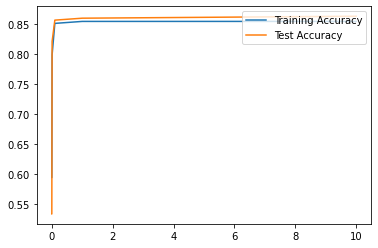

In [46]:
plt.plot(c_logreg,acc_test_logreg)
plt.plot(c_logreg,acc_train_logreg)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [47]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []


In [48]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C = c, solver = 'saga', max_iter = 10000)
    
    
    logreg2.fit(X_train,Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    
    acc_train = logreg2.score(X_train,Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    
    acc_test = logreg2.score(X_test,Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)
    

In [49]:
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)
    

Accuracy on training data = 0.629268
Accuracy on test data = 0.669967
Accuracy on training data = 0.850407
Accuracy on test data = 0.874587
Accuracy on training data = 0.860163
Accuracy on test data = 0.864686
Accuracy on training data = 0.865041
Accuracy on test data = 0.861386
Accuracy on training data = 0.865041
Accuracy on test data = 0.854785
Accuracy on training data = 0.863415
Accuracy on test data = 0.854785


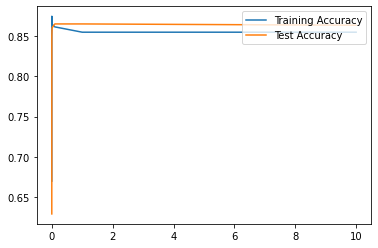

In [50]:
plt.plot(c_logreg2,acc_test_logreg2)
plt.plot(c_logreg2,acc_train_logreg2)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [51]:
poly = PolynomialFeatures(2)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [52]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []


Accuracy on training data = 0.533333
Accuracy on test data = 0.594059
Accuracy on training data = 0.533333
Accuracy on test data = 0.594059
Accuracy on training data = 0.821138
Accuracy on test data = 0.798680
Accuracy on training data = 0.878049
Accuracy on test data = 0.864686
Accuracy on training data = 0.902439
Accuracy on test data = 0.858086
Accuracy on training data = 0.902439
Accuracy on test data = 0.858086


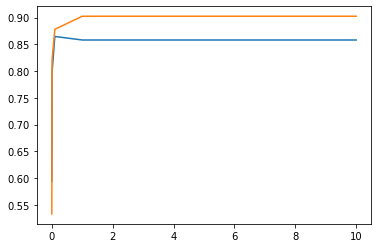

In [53]:
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
plt.plot(c_logreg,acc_test_logreg)
plt.plot(c_logreg,acc_train_logreg)

Accuracy on training data = 0.757724
Accuracy on test data = 0.808581
Accuracy on training data = 0.873171
Accuracy on test data = 0.877888
Accuracy on training data = 0.891057
Accuracy on test data = 0.881188
Accuracy on training data = 0.895935
Accuracy on test data = 0.867987
Accuracy on training data = 0.900813
Accuracy on test data = 0.861386
Accuracy on training data = 0.899187
Accuracy on test data = 0.858086


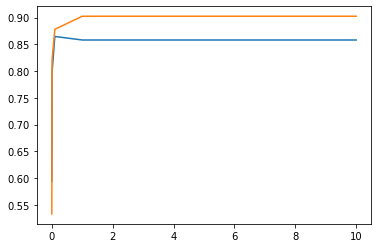

In [54]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
plt.plot(c_logreg2,acc_test_logreg)
plt.plot(c_logreg2,acc_train_logreg)